In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel('flight_price.xlsx')

In [4]:
# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


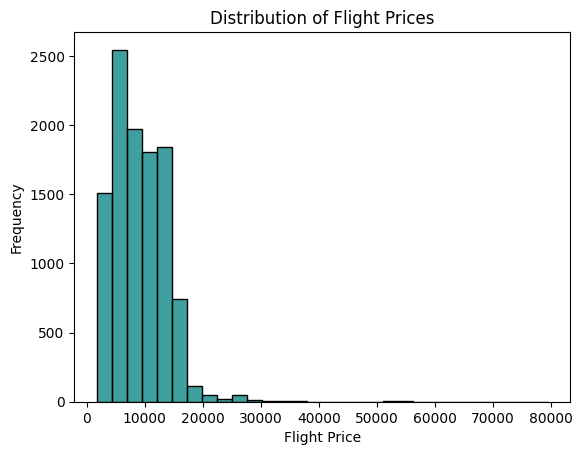

In [5]:
# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

sns.histplot(data=df,x='Price',bins=30,color='teal')
plt.xlabel('Flight Price')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Prices')
plt.show()

In [6]:
# Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

min_price = df['Price'].min()
max_price = df['Price'].max()
range_of_price = max_price - min_price

print("Minimum Price:", min_price)
print("Maximum Price:", max_price)
print("Price Range:", range_of_price)

Minimum Price: 1759
Maximum Price: 79512
Price Range: 77753


<ipython-input-7-7e0a0e13f0d5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Airline',y='Price',palette='dark')


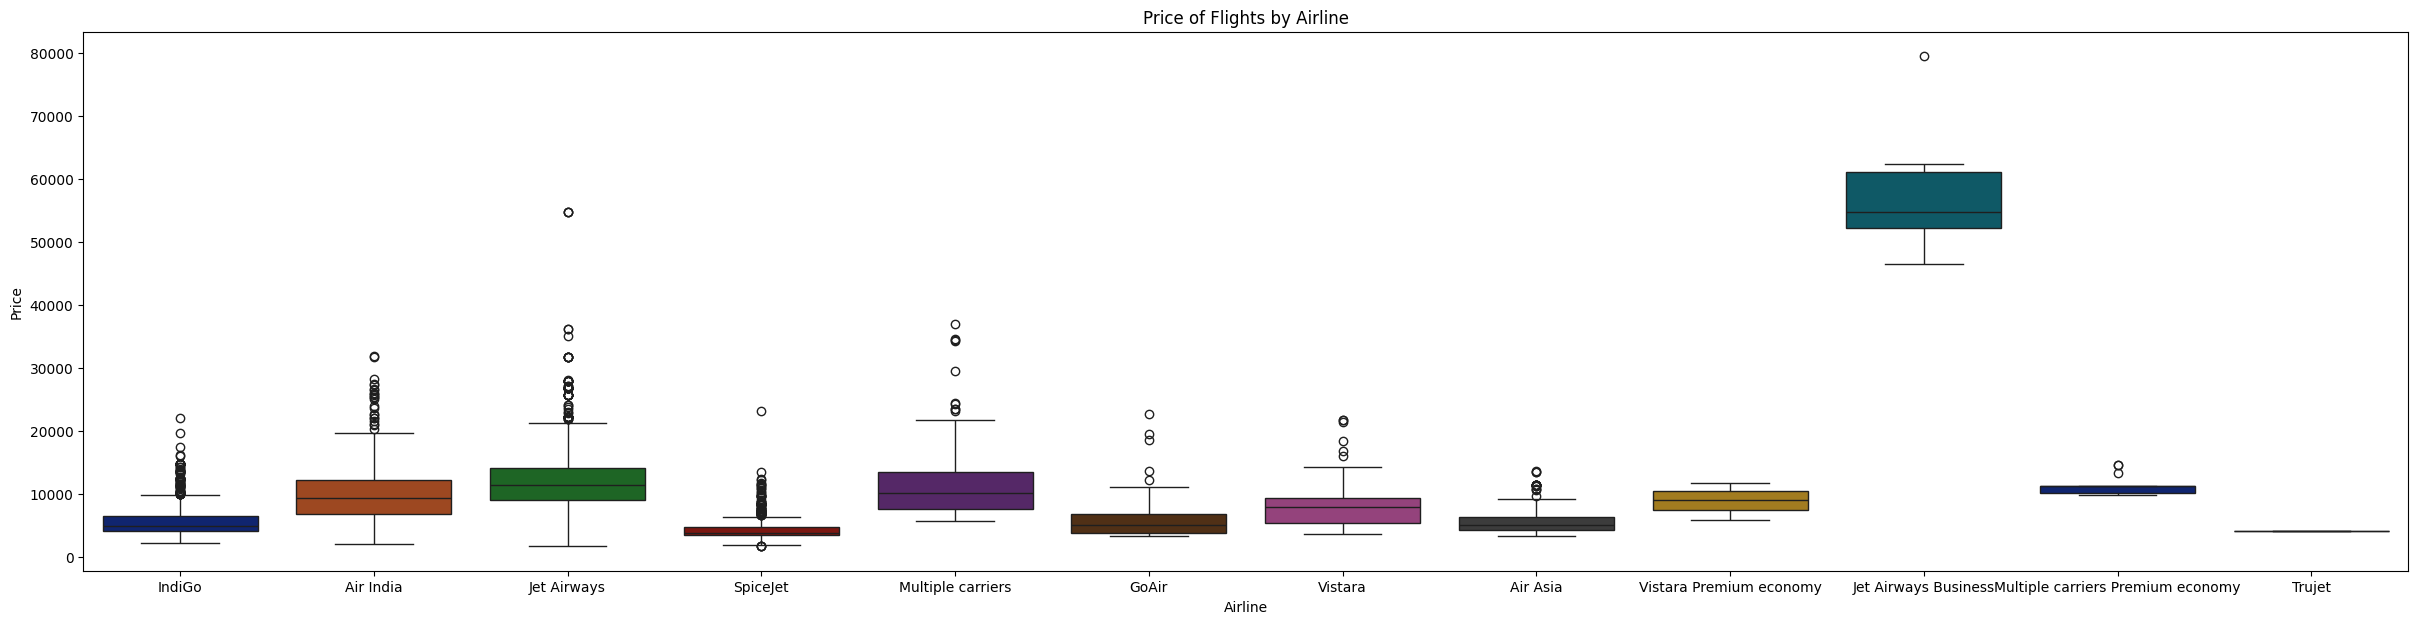

In [7]:
# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

plt.figure(figsize=(30,7))
sns.boxplot(data=df,x='Airline',y='Price',palette='dark')
plt.title('Price of Flights by Airline')
plt.show()

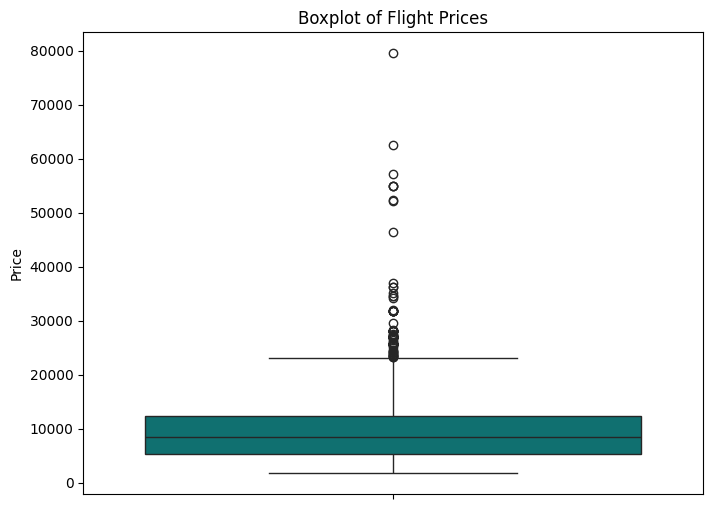

In [28]:
# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

plt.figure(figsize=(8, 6))
sns.boxplot(data=df,y='Price',color='teal')
plt.title('Boxplot of Flight Prices')
plt.show()

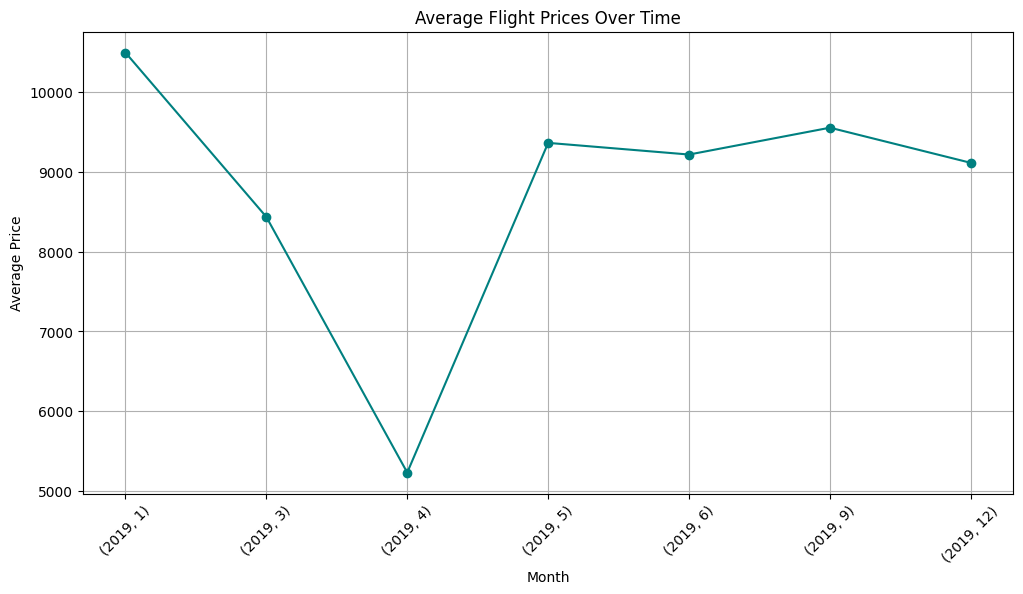

In [16]:
# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?
# Solution: Analyzing flight prices over time can reveal trends and seasonal variations in pricing. A time series plot can help visualize how flight prices fluctuate over time and how they correlate with travel demand can help identify peak travel seasons when prices are highest.

# Convert 'Date_of_Journey' to datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

# Extract month and year from 'Date_of_Journey'
df['Month'] = df['Date_of_Journey'].dt.month
df['Year'] = df['Date_of_Journey'].dt.year

# Group by month and year, calculate average flight prices
avg_prices_by_month = df.groupby(['Year', 'Month'])['Price'].mean()

# Plotting
plt.figure(figsize=(12, 6))
avg_prices_by_month.plot(marker='o', color='teal', linestyle='-')

plt.title('Average Flight Prices Over Time')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


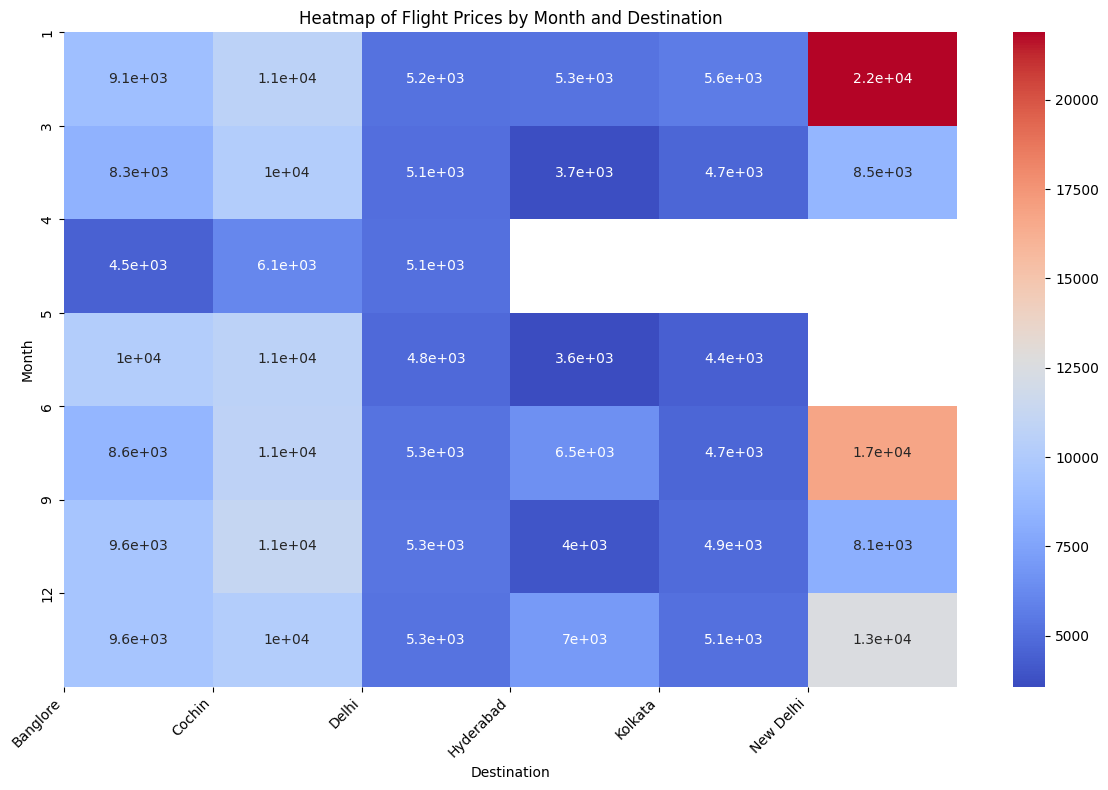

In [25]:
# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

# Solution: 1. Analyzing flight prices over time can reveal trends and seasonal variations. This includes examining prices by month, day of the week, and time of year.
# 2. Understanding price variations across different routes and destinations can help identify popular routes and destinations with high or low prices.
# 3. Use a heatmap to visualize the average flight prices for different routes or destinations across different months. This helps identify seasonal variations in prices for specific routes.

heatmap_data = df.pivot_table(index='Month', columns='Destination', values='Price', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm',annot=True)
plt.title('Heatmap of Flight Prices by Month and Destination')
plt.xlabel('Destination')
plt.ylabel('Month')
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns, rotation=45, ha='right')
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.tight_layout()
plt.show()

In [11]:
#Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

# Solution: To identify the factors that affect flight prices using the Flight Price dataset, I would consider several features such as Departure and Arrival Locations, Flight Duration, Flight Distance and analyze their relationships with flight prices.
# I would Use heatmaps to present the findings to the management team for the price variations based on departure/arrival times and days of the week. This provides insights into peak travel times and pricing dynamics.
df['Airline']=df['Airline'].map({'Jet Airways':0, 'IndiGo':1, 'Air India':2, 'Multiple carriers':3, 'SpiceJet':4, 'Vistara':5, 'GoAir':6, 'Air Asia':7,'Multiple carriers Premium economy':3, 'Jet Airways Business':0, 'Vistara Premium economy':5, 'Trujet':4})
df['Dep_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_mins']=df['Dep_Time'].str.split(':').str[1]
df.drop('Dep_Time',axis=1,inplace=True)

df['Arrival_hour']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_mins']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]
df.drop('Arrival_Time',axis=1,inplace=True)

def convert_into_minutes(Duration):
  total_minutes=0
  for i in Duration.split():
    if 'h' in i:
      total_minutes+=int(i.replace('h',''))*60
    if 'm' in i:
      total_minutes+=int(i.replace('m',''))
  return total_minutes

df['Duration']=df['Duration'].apply(convert_into_minutes)
df.drop(['Additional_Info', 'Route'], axis=1, inplace=True)

df['Source']=df['Source'].map({'Delhi':0, 'Kolkata':1, 'Banglore':2, 'Mumbai':3, 'Chennai':4})
df['Destination']=df['Destination'].map({'Cochin':0, 'Banglore':1, 'Delhi':2, 'New Delhi':3, 'Hyderabad':4})
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4, 'nan':1})



<ipython-input-12-167c23b54a30>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")


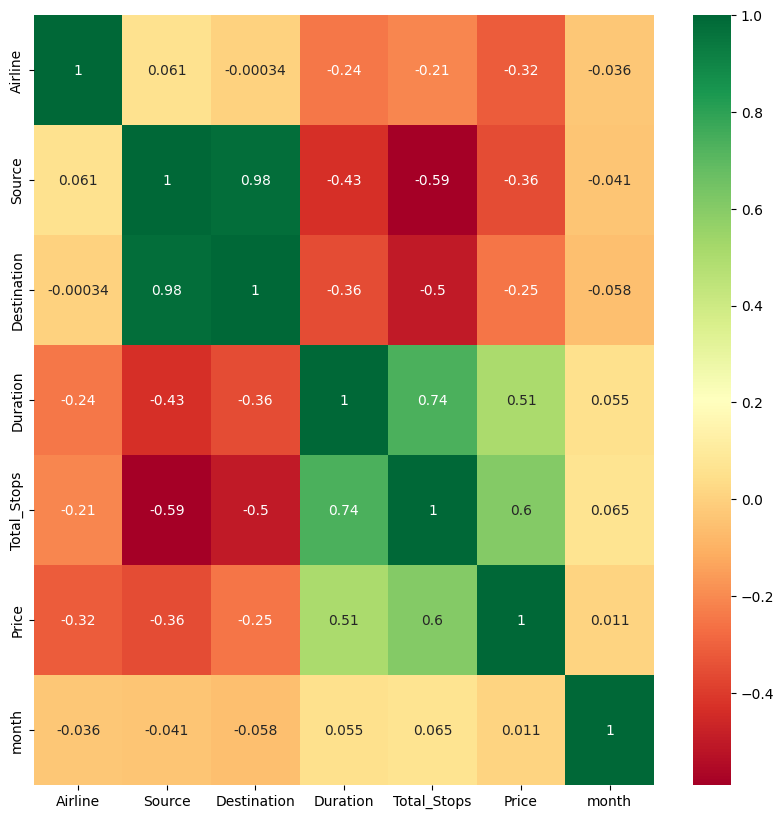

In [12]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [14]:
df['Reviews']=df['Reviews'].str.replace('3.0M','3000000')
df['Reviews']=df['Reviews'].astype('int')

<ipython-input-14-691d57b3305c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reviews']=df['Reviews'].str.replace('3.0M','3000000')


In [15]:
df.drop(index=10472,inplace=True)

In [16]:
def convert_size(size):
  if 'M' in size:
    return int(float(size.replace('M',''))*1000)
  elif 'k' in size:
    return int(float(size.replace('k','')))
  elif 'Varies with device' in size:
    return np.nan
  else:
    return np.nan

df['Size'] = df['Size'].apply(convert_size)

In [17]:
cols=['Installs','Price']
chars_to_remove=[',','+','$']
for i in cols:
  for j in chars_to_remove:
    df[i]=df[i].str.replace(j,'')

<ipython-input-17-90bea12f761f>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[i]=df[i].str.replace(j,'')


In [18]:
df['Installs']=df['Installs'].astype('int')
df['Price']=df['Price'].astype('float')

In [19]:
df['Last Updated']=pd.to_datetime(df['Last Updated'])
df['day']=df['Last Updated'].dt.day
df['month']=df['Last Updated'].dt.month
df['year']=df['Last Updated'].dt.year

In [20]:
df.drop_duplicates(subset=['App'],keep='last',inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  day             9659 non-null   int64         
 14  month           9659 non-null   int64         
 15  yea

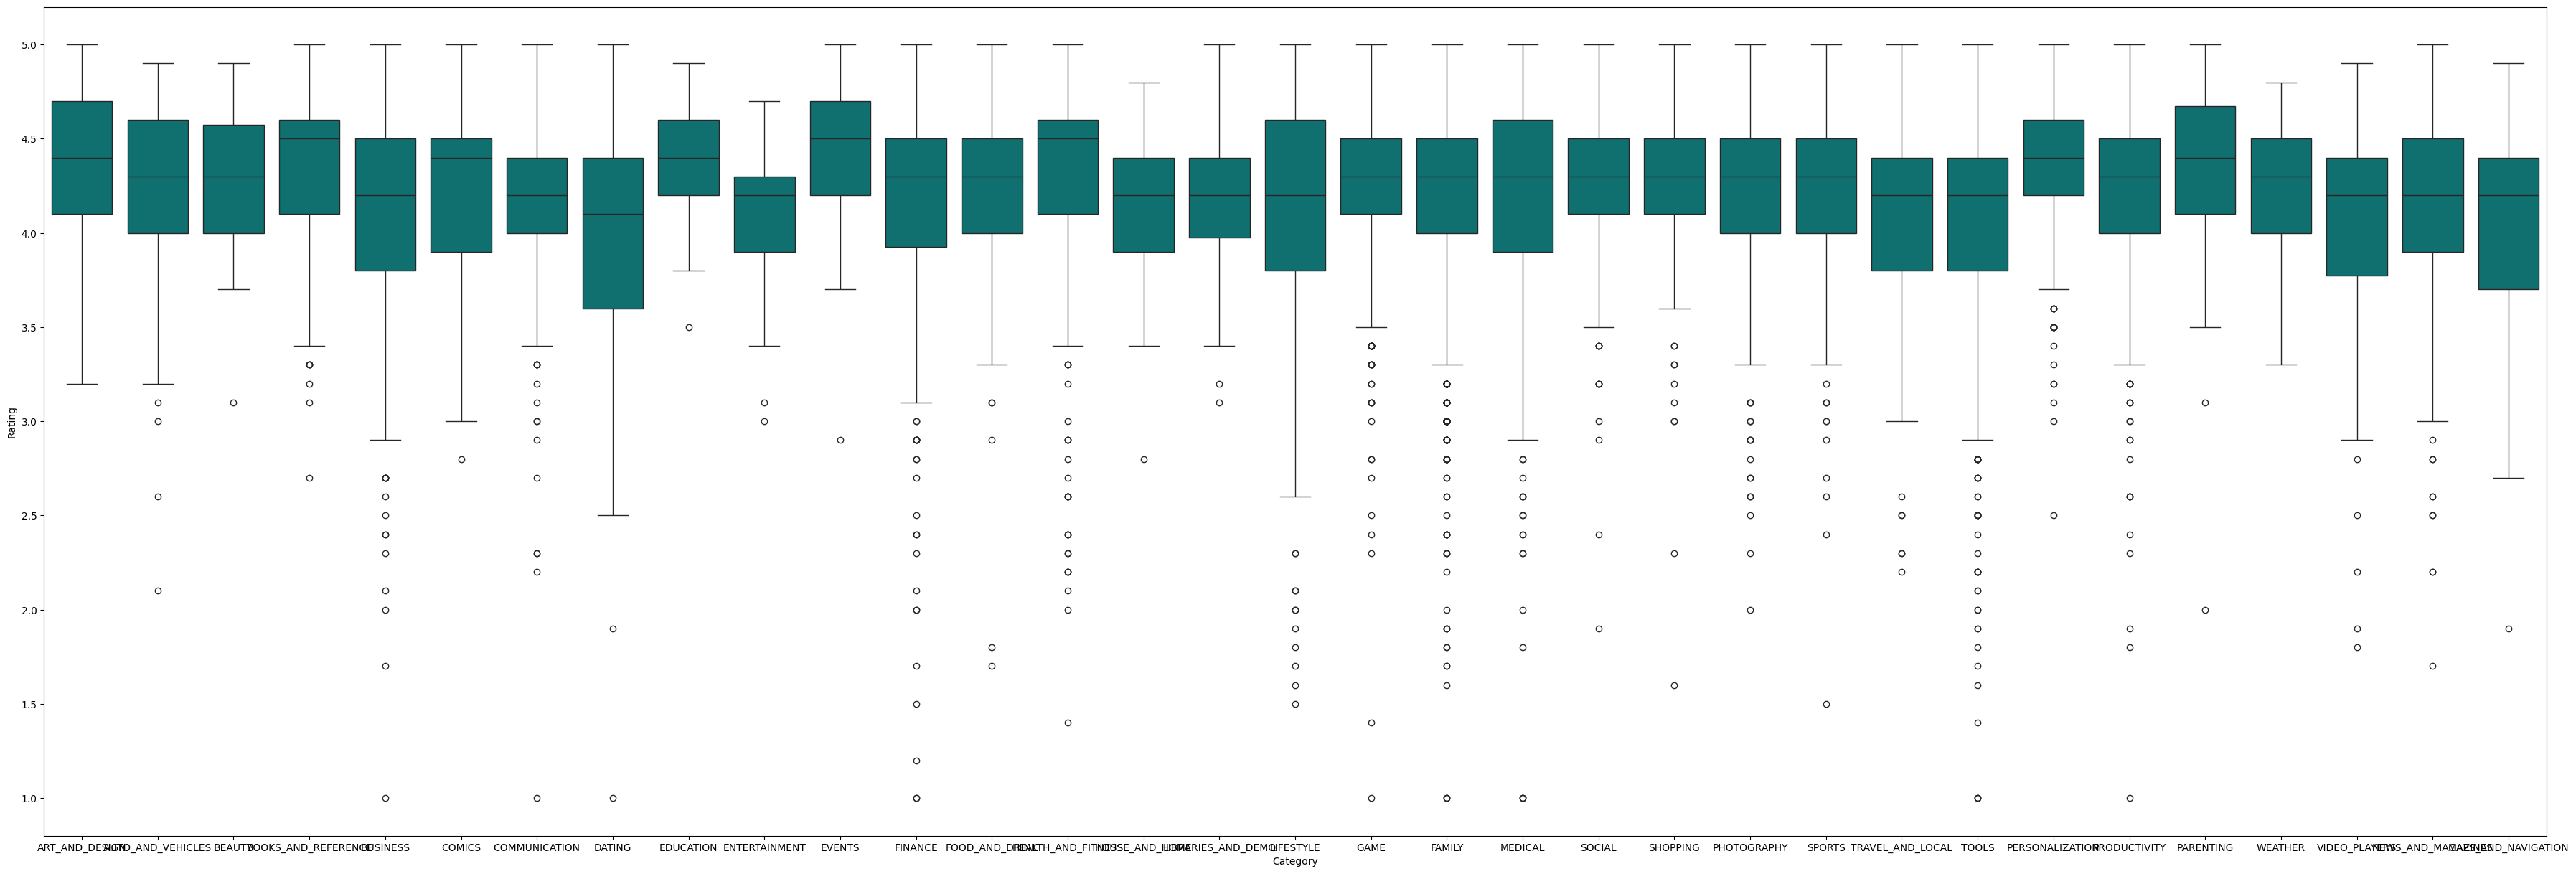

In [22]:
# Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

plt.figure(figsize=(45,15))
sns.boxplot(x=df['Category'],y=df['Rating'],color='teal')
plt.show()

<Axes: >

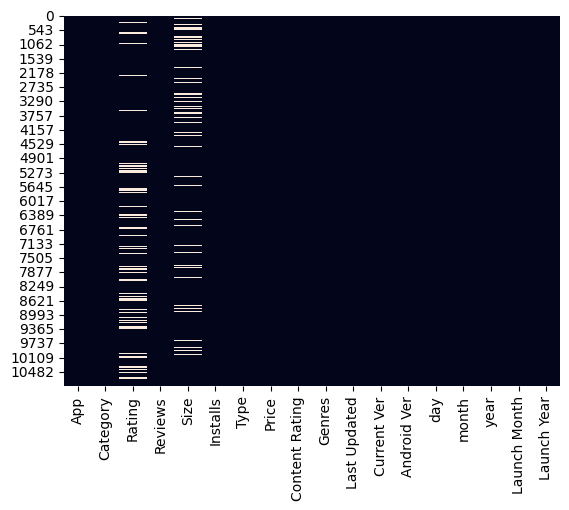

In [60]:
# Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

# Missing values affect statistical measures such as mean, median, and standard deviation.
# Missing values may affect the visualization of data, leading to incomplete or misleading plots.

sns.heatmap(df.isnull(), cbar=False)

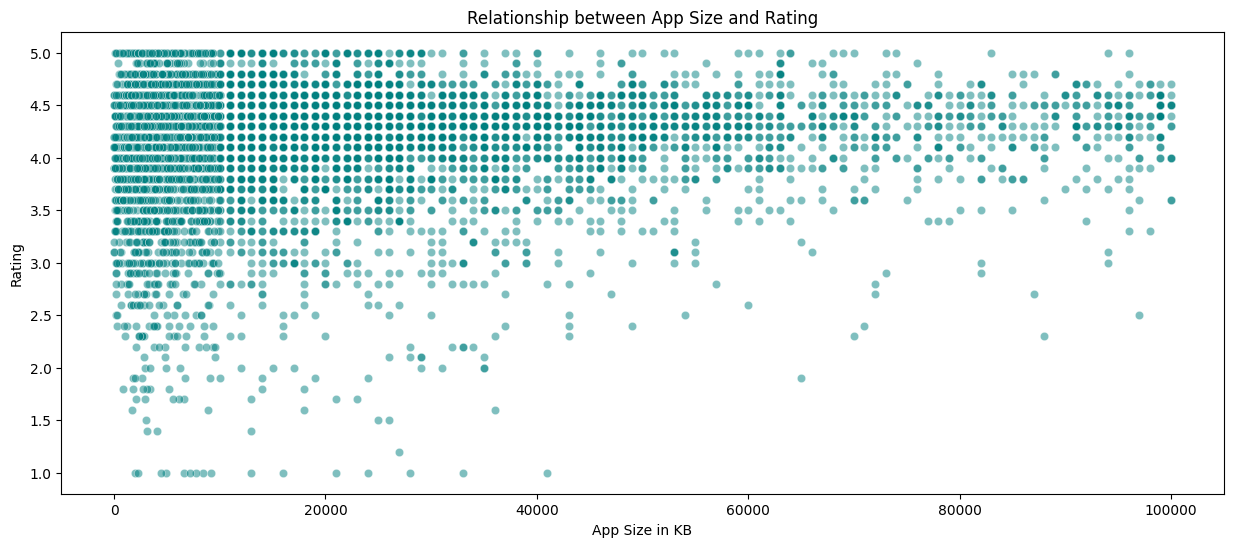

In [24]:
# Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

plt.figure(figsize=(15,6))
sns.scatterplot(data=df,x='Size',y='Rating',color='teal',alpha=0.5)
plt.title('Relationship between App Size and Rating')
plt.xlabel('App Size in KB')
plt.ylabel('Rating')
plt.show()

In [68]:
df.groupby('Type')['Price'].mean()

Type
Free     0.000000
Paid    14.055902
Name: Price, dtype: float64

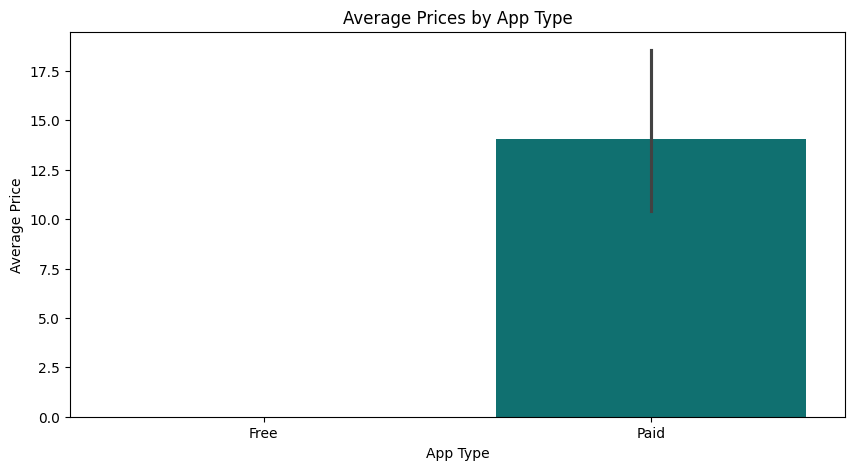

In [67]:
# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Type',y='Price',estimator=np.mean,color='teal')
plt.title('Average Prices by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Price')
plt.show()

In [27]:
# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

installs_freq_table = df.groupby('App')['Installs'].sum().reset_index()
top_10_app = installs_freq_table.sort_values(by='Installs',ascending=False).head(10)

print("Frequency Table:\n",installs_freq_table)
print("Top 10 most popular apps with the highest number of installs:\n",top_10_app)

Frequency Table:
                                                    App  Installs
0                 "i DT" Fútbol. Todos Somos Técnicos.       500
1                        +Download 4 Instagram Twitter   1000000
2                           - Free Comics - Comic Apps     10000
3                                                   .R     10000
4                                               /u/app     10000
...                                                ...       ...
9654                           뽕티비 - 개인방송, 인터넷방송, BJ방송    100000
9655                                        💎 I'm rich     10000
9656     💘 WhatsLov: Smileys of love, stickers and GIF   1000000
9657  📏 Smart Ruler ↔️ cm/inch measuring for homework!     10000
9658  🔥 Football Wallpapers 4K | Full HD Backgrounds 😍   1000000

[9659 rows x 2 columns]
Top 10 most popular apps with the highest number of installs:
                                 App    Installs
4869                          Gmail  1000000000
4949              

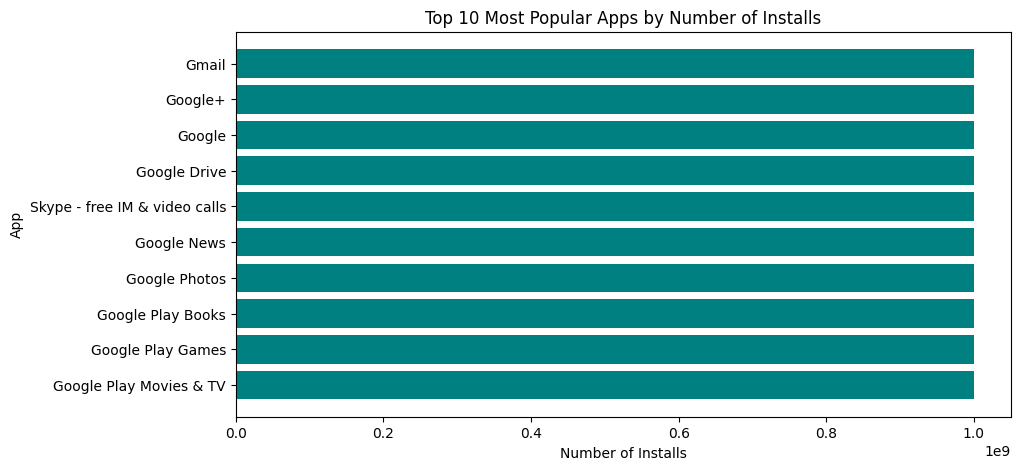

In [28]:
plt.figure(figsize=(10,5))
plt.barh(top_10_app['App'],top_10_app['Installs'],color='teal')
plt.xlabel('Number of Installs')
plt.ylabel('App')
plt.title('Top 10 Most Popular Apps by Number of Installs')
plt.gca().invert_yaxis()
plt.show()

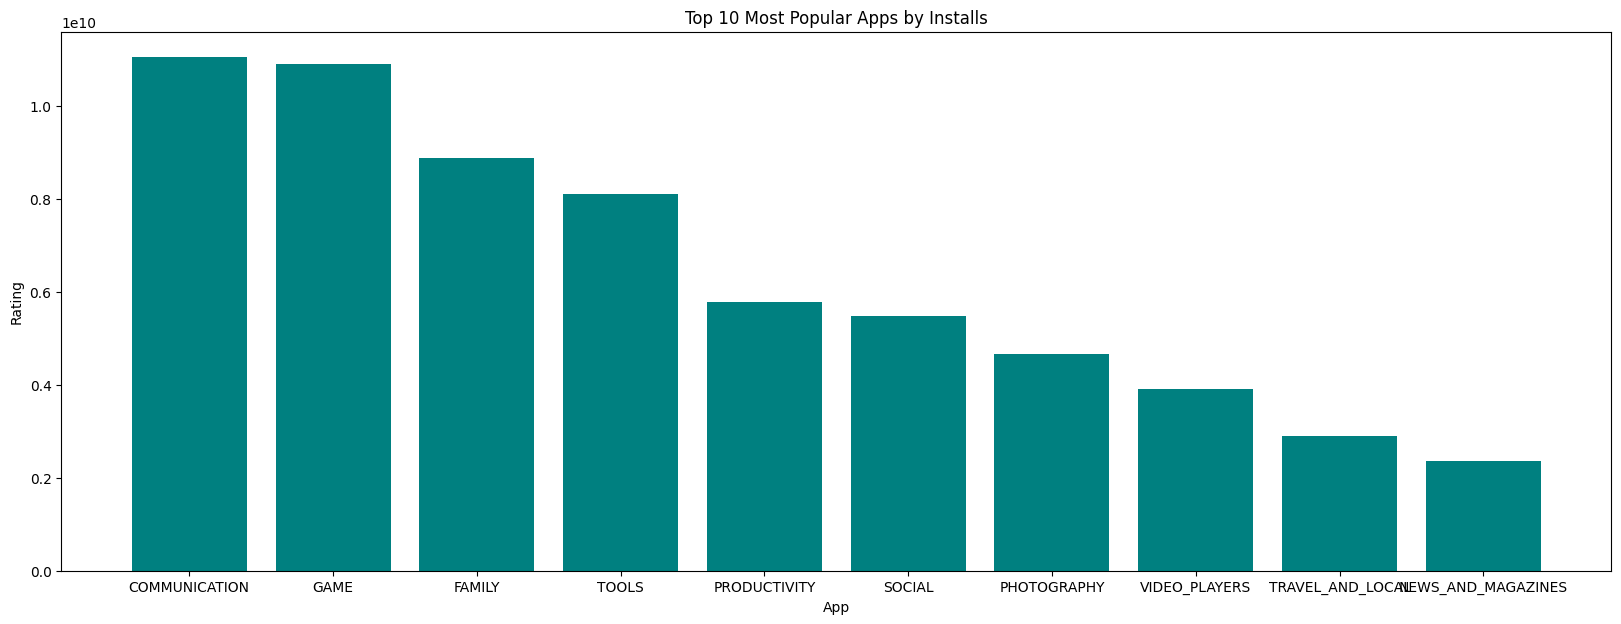

In [54]:
# Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

# Solution : 1.I would analyze the distribution of apps across different categories to understand the overall landscape of app categories available on the Google Playstore.
# 2.  I would examine the total number of installs for apps in each category. 3. I would analyze the average ratings of apps within each category. Based on these features, I would recommend the company to focus on categories that exhibit high levels of popularity, user engagement, by showing bar chart.
popular_app = df.groupby('Category').agg({'Installs':'sum','Rating':'mean'}).reset_index()
top_10_app = popular_app.sort_values(by=['Installs','Rating'],ascending=False).head(10)

plt.figure(figsize=(20,7))
plt.bar(top_10_app['Category'],top_10_app['Installs'],color='teal')
plt.xlabel('App')
plt.ylabel('Rating')
plt.title('Top 10 Most Popular Apps by Installs')
plt.show()


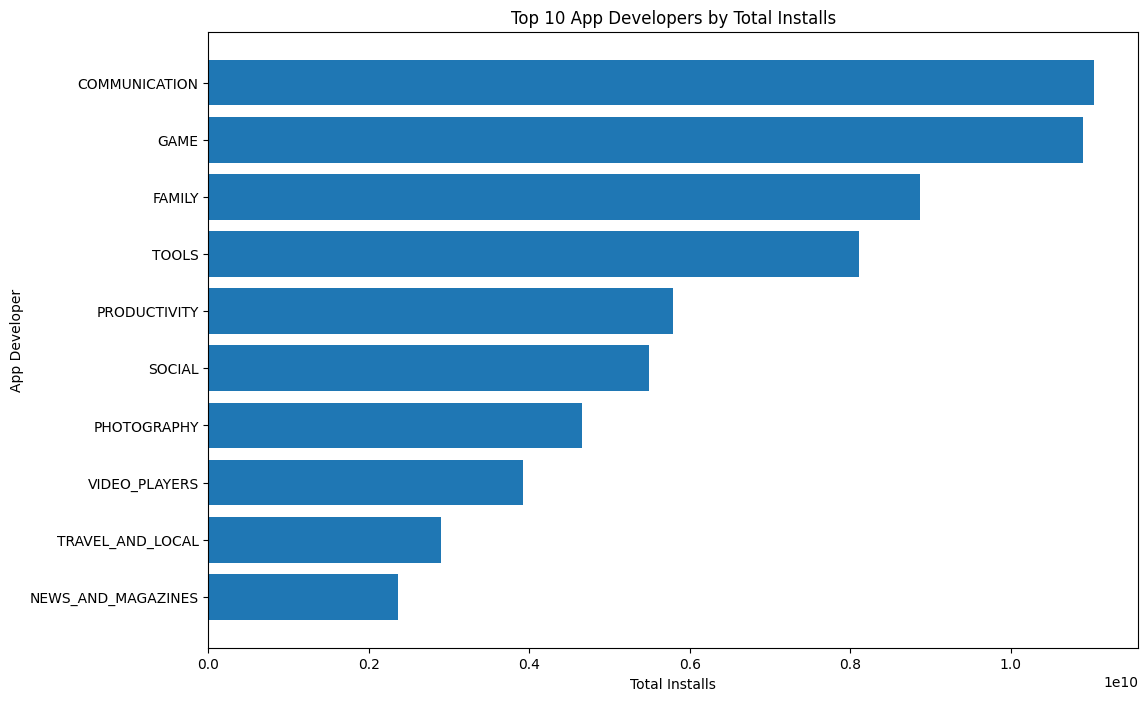

In [53]:
# Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?
# Solution: 1. Analyze the total number of installs for apps developed by different developers. 2. Evaluate the average ratings of apps developed by different developers. Higher average ratings suggest greater user satisfaction and quality of apps.
# 3. Examine the total number of reviews received by apps developed by different developers.

# Group by app developer and aggregate metrics
developer_stats = df.groupby('Category').agg({
    'Installs': 'sum',
    'Rating': 'mean',
    'Reviews': 'sum'
}).reset_index()

# Sort developers by total installs
developer_stats = developer_stats.sort_values(by='Installs', ascending=False)

# Top 10 successful app developers by installs
top_10_developers = developer_stats.head(10)

# Visualization
plt.figure(figsize=(12, 8))
plt.barh(top_10_developers['Category'], top_10_developers['Installs'])
plt.xlabel('Total Installs')
plt.ylabel('App Developer')
plt.title('Top 10 App Developers by Total Installs')
plt.gca().invert_yaxis()  # Invert y-axis to display highest installs at the top
plt.show()


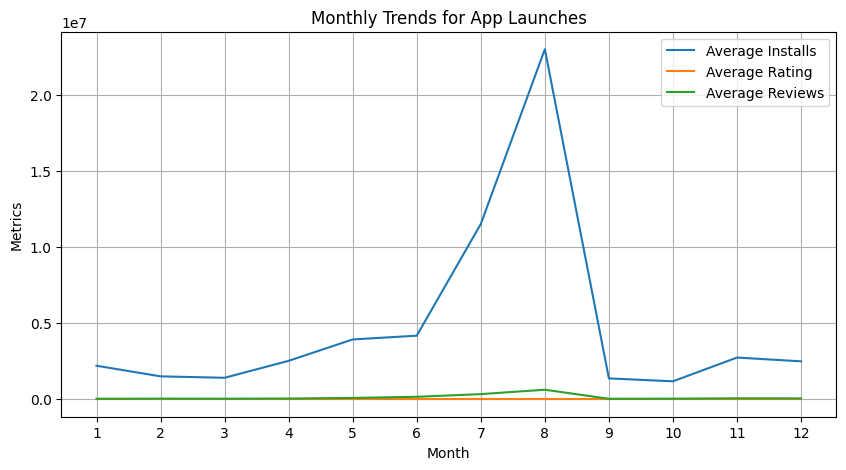

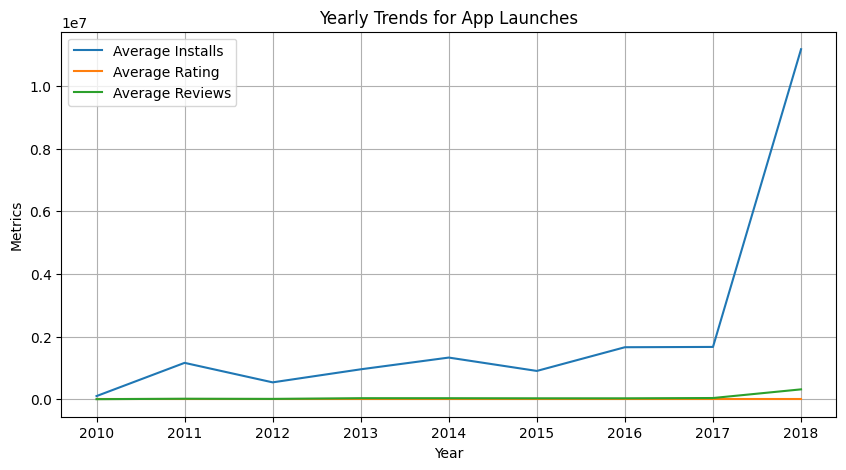

In [70]:
# Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

# solution: 1. Analyze the distribution of app launches over different months and years to identify trends and seasonal patterns in app releases.
# 2. Examine the average number of installs for apps launched during different months or years. 3. Evaluate the average ratings of apps based on their launch month or year.
# 4. Analyze the average number of reviews received by apps launched in different months or years.
# By analyzing these features and visualizing the findings using appropriate data visualizations, the marketing research firm can identify patterns and trends in app launches, helping them make informed recommendations on the best time to launch a new app in the Google Playstore.

# Group by launch month and calculate average installs, ratings, and reviews
monthly_stats = df.groupby('month').agg({
    'Installs': 'mean',
    'Rating': 'mean',
    'Reviews': 'mean'
}).reset_index()

# Group by launch year and calculate average installs, ratings, and reviews
yearly_stats = df.groupby('year').agg({
    'Installs': 'mean',
    'Rating': 'mean',
    'Reviews': 'mean'
}).reset_index()

# Visualization - Monthly Trends
plt.figure(figsize=(10, 5))
plt.plot(monthly_stats['month'], monthly_stats['Installs'], label='Average Installs')
plt.plot(monthly_stats['month'], monthly_stats['Rating'], label='Average Rating')
plt.plot(monthly_stats['month'], monthly_stats['Reviews'], label='Average Reviews')
plt.xlabel('Month')
plt.ylabel('Metrics')
plt.title('Monthly Trends for App Launches')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13))  # Set x-axis ticks for each month
plt.show()

# Visualization - Yearly Trends
plt.figure(figsize=(10, 5))
plt.plot(yearly_stats['year'], yearly_stats['Installs'], label='Average Installs')
plt.plot(yearly_stats['year'], yearly_stats['Rating'], label='Average Rating')
plt.plot(yearly_stats['year'], yearly_stats['Reviews'], label='Average Reviews')
plt.xlabel('Year')
plt.ylabel('Metrics')
plt.title('Yearly Trends for App Launches')
plt.legend()
plt.grid(True)
plt.show()
